In [1]:
import pandas as pd
data = pd.read_csv('ResearchData.csv')



In [2]:
data['year'] = pd.DatetimeIndex(data['Start Date']).year

In [3]:
data

,Team,Runs,Wkts,Overs,Lead,Balls,Ave,RPO,Result,opposition,Ground,Start Date,balls_left,home_advantage,year
0,England,234,8,116.4x5,299,584,29.25,2.40,draw,Australia,Lord's,17 Jul 1893,0,1,1893
1,Australia,230,8,94.0x5,289,470,28.75,2.93,draw,England,Nottingham,1 Jun 1899,495,-1,1899
2,Australia,346,7,181.0x5,170,905,49.42,2.29,draw,England,Manchester,17 Jul 1899,135,-1,1899
3,Australia,372,7,78,214,468,53.14,4.76,draw,South Africa,Johannesburg,11-Oct-02,192,-1,2002
4,England,426,5,153,401,918,85.20,2.78,won,Australia,Nottingham,29-May-05,436,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,Sri Lanka,194,9,42.2,436,254,21.55,4.58,won,Bangladesh,Pallekele,29-Apr-21,426,1,2021
612,New Zealand,169,6,52.3,272,315,28.16,3.21,draw,England,Lord's,02-Jun-21,420,-1,2021
613,Bangladesh,284,1,67.4,476,406,284.00,4.19,won,Zimbabwe,Harare,07-Jul-21,568,-1,2021
614,India,298,8,109.3,271,657,37.25,2.72,won,England,Lord's,12-Aug-21,341,-1,2021


In [4]:
data['Ground'].unique()

array(["Lord's", 'Nottingham', 'Manchester', 'Johannesburg', 'Leeds',
       'The Oval', 'Durban', 'Brisbane', 'Birmingham', 'Wellington',
       'Port of Spain', 'Kingston', 'Sydney', 'Chennai', 'Bridgetown',
       'Georgetown', 'Adelaide', 'Melbourne', 'Kolkata', 'Cape Town',
       'Port Elizabeth', 'Auckland', 'Lahore', 'Karachi', 'Mumbai (BS)',
       'Kanpur', 'Christchurch', 'Dhaka', 'Hyderabad (Deccan)', 'Perth',
       'Bengaluru', 'Mumbai', 'Hyderabad (Sind)', 'Faisalabad', 'Napier',
       'Delhi', "St John's", 'Nagpur', 'Kandy', 'Colombo (SSC)',
       'Colombo (PSS)', 'Hobart', 'Hamilton', 'Colombo (RPS)', 'Bulawayo',
       'Harare', 'Moratuwa', 'Mohali', 'Sialkot', 'Centurion',
       'Ahmedabad', 'Galle', 'Sharjah', 'Chattogram', 'Gros Islet',
       'Cairns', 'Basseterre', 'Providence', 'North Sound', 'Dubai (DSC)',
       'Abu Dhabi', 'Dunedin', 'Pallekele', 'Southampton', 'Khulna',
       'Indore', 'Rajkot', 'Roseau', 'Potchefstroom', 'Canberra',
       'Visakhapatn

# Visulisation

# Number of wins,draws,ties.

In [5]:
my_tab = pd.crosstab(index=data["Result"],  # Make a crosstab
                     columns="count")                  # Name the count column

In [6]:
my_tab

col_0,count
Result,
lost,13
won,274
draw,328
tied,1


<AxesSubplot:>

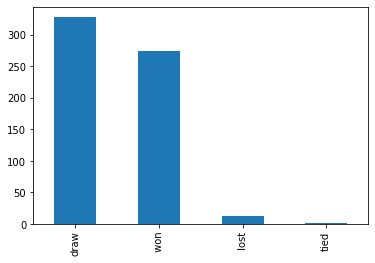

In [7]:
data['Result'].value_counts().plot(kind='bar')

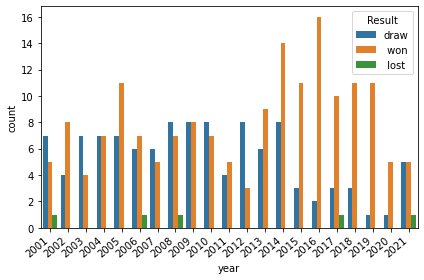

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.countplot(x="year", hue="Result", data=data[(data.year>2000)&(data.year<2022)])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()



# Team to Team analysis

In [9]:
my_tab = pd.crosstab(index=data["Team"],  # Make a crosstab
                     columns="count")


In [10]:
my_tab

col_0,count
Team,
Australia,128
Bangladesh,10
England,136
India,69
New Zealand,53
Pakistan,57
South Africa,67
Sri Lanka,37
West Indies,49


<AxesSubplot:>

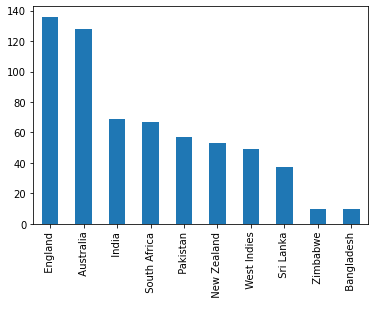

In [11]:
data['Team'].value_counts().plot(kind='bar')

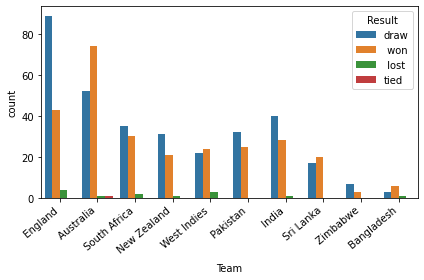

In [12]:
ax=sns.countplot(x="Team", hue="Result", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


# Lead vs Balls_Left

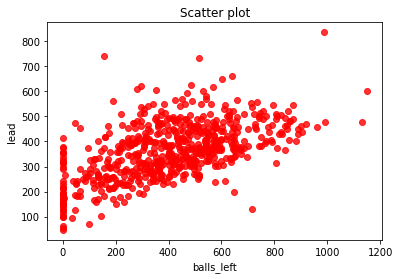

In [13]:
import matplotlib.pyplot as plt

plt.scatter(data['balls_left'], data['Lead'], c='red', alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('balls_left')
plt.ylabel('lead')
plt.show()

# Machine learning

In [14]:
data['Result'].replace('draw',0,inplace=True)
data['Result'].replace(' won',1,inplace=True)
data['Result'].replace(' lost',2,inplace=True)
data['Result'].replace('tied',3,inplace=True)

In [15]:
data['Team'].replace('  England',0,inplace=True)
data['Team'].replace('  Australia',1,inplace=True)
data['Team'].replace('  South Africa',2,inplace=True)
data['Team'].replace('  New Zealand',3,inplace=True)
data['Team'].replace('  West Indies',4,inplace=True)
data['Team'].replace('  Pakistan',5,inplace=True)
data['Team'].replace('  India',6,inplace=True)
data['Team'].replace('  Sri Lanka',7,inplace=True)
data['Team'].replace('  Zimbabwe',8,inplace=True)
data['Team'].replace('  Bangladesh',9,inplace=True)

In [16]:
data['opposition'].replace('England',0,inplace=True)
data['opposition'].replace('Australia',1,inplace=True)
data['opposition'].replace('South Africa',2,inplace=True)
data['opposition'].replace('New Zealand',3,inplace=True)
data['opposition'].replace('West Indies',4,inplace=True)
data['opposition'].replace('Pakistan',5,inplace=True)
data['opposition'].replace('India',6,inplace=True)
data['opposition'].replace('Sri Lanka',7,inplace=True)
data['opposition'].replace('Zimbabwe',8,inplace=True)
data['opposition'].replace('Bangladesh',9,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

data['Ground']= label_encoder.fit_transform(data['Ground'])


In [18]:
data

,Team,Runs,Wkts,Overs,Lead,Balls,Ave,RPO,Result,opposition,Ground,Start Date,balls_left,home_advantage,year
0,0,234,8,116.4x5,299,584,29.25,2.40,0,1,44,17 Jul 1893,0,1,1893
1,1,230,8,94.0x5,289,470,28.75,2.93,0,0,55,1 Jun 1899,495,-1,1899
2,1,346,7,181.0x5,170,905,49.42,2.29,0,0,45,17 Jul 1899,135,-1,1899
3,1,372,7,78,214,468,53.14,4.76,0,2,35,11-Oct-02,192,-1,2002
4,0,426,5,153,401,918,85.20,2.78,1,1,55,29-May-05,436,1,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,7,194,9,42.2,436,254,21.55,4.58,1,9,56,29-Apr-21,426,1,2021
612,3,169,6,52.3,272,315,28.16,3.21,0,0,44,02-Jun-21,420,-1,2021
613,9,284,1,67.4,476,406,284.00,4.19,1,8,30,07-Jul-21,568,-1,2021
614,6,298,8,109.3,271,657,37.25,2.72,1,0,44,12-Aug-21,341,-1,2021


In [19]:
features=['Team','Runs','Lead','Balls','RPO','opposition','Ground','balls_left','home_advantage']
output=['Result']
x=data[features]
y=data[output]

In [20]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.4,random_state=21)

In [21]:
y_train

,Result
467,0
527,0
552,1
146,0
469,0
...,...
419,0
120,1
368,0
48,0


In [22]:
x_train

,Team,Runs,Lead,Balls,RPO,opposition,Ground,balls_left,home_advantage
467,7,129,64,270,2.86,6,19,0,1
527,3,250,260,389,3.85,5,22,402,-1
552,6,377,433,644,3.51,3,37,525,1
146,1,300,233,715,2.51,4,7,114,-1
469,3,448,326,810,3.31,6,32,102,-1
...,...,...,...,...,...,...,...,...,...
419,6,100,249,144,4.16,9,14,168,-1
120,6,261,373,576,2.71,3,3,370,-1
368,2,134,320,156,5.15,0,6,0,-1
48,0,174,316,414,2.52,1,45,366,1


In [23]:
x_test

,Team,Runs,Lead,Balls,RPO,opposition,Ground,balls_left,home_advantage
452,0,311,521,428,4.35,1,44,642,1
391,9,204,380,307,3.98,8,14,386,1
551,2,132,399,282,2.80,3,13,350,1
595,6,343,418,675,3.04,4,54,161,-1
448,0,279,130,486,3.44,4,7,716,-1
...,...,...,...,...,...,...,...,...,...
392,0,332,324,487,4.09,2,35,357,-1
128,3,175,267,492,2.13,6,32,280,-1
547,0,445,342,774,3.44,5,6,425,1
413,0,296,379,509,3.48,5,44,438,1


In [24]:
y_test

,Result
452,1
391,1
551,1
595,1
448,0
...,...
392,1
128,0
547,1
413,0


# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(x_train,y_train)

<ipython-input-25-ee97ab3dde89>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import confusion_matrix

y_pred_rnf = rnd_clf.predict(x_test)
cnf = confusion_matrix(y_pred_rnf, y_test)
print(cnf)


[[110  32   2]
 [ 24  78   0]
 [  0   1   0]]


# LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

log = LogisticRegression()
log.fit(x_test, y_test)

C:\Users\ARYAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ARYAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
from sklearn.metrics import confusion_matrix

y_pred_log = log.predict(x_test)
cnf = confusion_matrix(y_pred_log, y_test)
print(cnf)

[[104  24   2]
 [ 30  87   0]
 [  0   0   0]]


# Support Vector

In [29]:
from sklearn.svm import SVC 

classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train,y_train)  

C:\Users\ARYAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(kernel='linear', random_state=0)

In [30]:
from sklearn.metrics import confusion_matrix

y_pred_svm = classifier.predict(x_test)
cnf = confusion_matrix(y_pred_svm, y_test)
print(cnf)

[[108  35   1   0]
 [ 26  75   1   0]
 [  0   0   0   0]
 [  0   1   0   0]]


In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy of logistic regression is:",accuracy_score(y_test, y_pred_log)*100,"%")
print("Accuracy of SVM is",accuracy_score(y_test, y_pred_svm)*100,"%")
print("Accuracy of random forest is",accuracy_score(y_test, y_pred_rnf)*100,"%")

Accuracy of logistic regression is: 77.32793522267207 %
Accuracy of SVM is 74.08906882591093 %
Accuracy of random forest is 76.11336032388664 %
